In [1]:
from IPython.display import display, clear_output
import pandas as pd
from local_packages import * # local package

## Initialize variables

In [3]:

c = C(SO_FILE_PATH)
FILE_NAME = datasets_dropdown.value
FILE_PATH = f'{FOLDER_PATH}{FILE_NAME}'
max_read_rows = fileDepth(FILE_PATH)
max_data_len  = fileWidth(FILE_PATH)
read_rows = max_read_rows
data_len  = max_data_len
knn = 10
k   = fileClusters(FILE_PATH)

### Attach GUI behaviour to variables

In [4]:

def update_knn():
    global knn
    knn = knn_slider.get_interact_value()

def update_k():
    global k
    k = clusters_slider.get_interact_value()

def update_read_rows():
    global read_rows
    bool = read_rows_button.get_interact_value()
    if bool:
        read_rows = max_read_rows
    else:
        read_rows = read_rows_text.get_interact_value()

def update_data_len():
    global data_len
    bool = data_len_button.get_interact_value()
    if bool:
        data_len = max_data_len
    else:
        data_len = data_len_text.get_interact_value()

def update_FILE_NAME():
    global FILE_NAME, FILE_PATH, max_read_rows, max_data_len
    FILE_NAME = datasets_dropdown.get_interact_value()
    FILE_PATH = f'{FOLDER_PATH}{FILE_NAME}'
    max_read_rows = fileDepth(FILE_PATH)
    max_data_len  = fileWidth(FILE_PATH)
    read_rows_text.value = max_read_rows
    data_len_text.value  = max_data_len
    clusters_slider.value = fileClusters(FILE_PATH)
    update_read_rows();update_data_len();update_k()
    
datasets_dropdown.on_trait_change(update_FILE_NAME)
knn_slider       .on_trait_change(update_knn)
clusters_slider  .on_trait_change(update_k)
read_rows_button .on_trait_change(update_read_rows)
read_rows_text   .on_trait_change(update_read_rows)
data_len_button  .on_trait_change(update_data_len)
data_len_text    .on_trait_change(update_data_len)

read_rows_text.value = max_read_rows
data_len_text.value  = max_data_len
clusters_slider.value = k

### Display GUI

In [5]:
GUI

## Inspect variables

Dataset: three_moons.csv


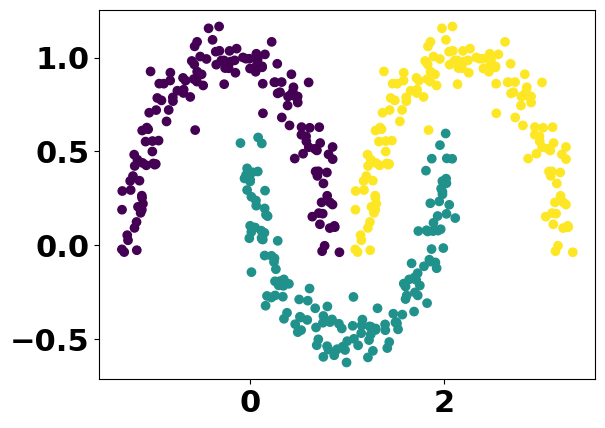

k_Nearest_Neighbours: 10 | k_Clusters: 3
Width: 3 | Depth: 450


In [445]:
all_dots = pd.read_csv(FILE_PATH)
print(f"Dataset: {bcolors.OKCYAN}{FILE_NAME}{bcolors.ENDC}")
inspect_dataset(all_dots)
print(f"k_Nearest_Neighbours: {bcolors.OKCYAN}{knn}{bcolors.ENDC} "
      f"| k_Clusters: {bcolors.OKCYAN}{k}{bcolors.ENDC}\n"
      f"Width: {bcolors.OKCYAN}{data_len}{bcolors.ENDC} "
      f"| Depth: {bcolors.OKCYAN}{read_rows}{bcolors.ENDC}")

# Compute **spectral_embedding**

In [446]:
spectral_embedding = c.spectral_embedding(data_len, read_rows, FILE_PATH, knn, k_clusters=k)
m = c.kmeans(data_len, read_rows, FILE_PATH, k_clusters=k)


REQ_DATA_LEN: 3 	TRU_DATA_LEN: 3
REQ_N_ROWS  : 450 	TRU_N_ROWS  : 450+1

ORIGINAL DATASET: (x,y,target)
0	1.857073 0.223809 1.000000 
1	0.596793 -0.295320 1.000000 
2	0.899760 -0.553561 1.000000 
3	1.870003 -0.020444 1.000000 
4	-0.930402 0.861173 0.000000 
5	0.516360 -0.381087 1.000000 
6	0.409339 0.638497 0.000000 
7	-0.950691 0.784809 0.000000 
450x3 matrix. 8x3 printed.

k of clusters: 3

TRIMMED DATASET: (x,y)
0	1.857073 0.223809 
1	0.596793 -0.295320 
2	0.899760 -0.553561 
3	1.870003 -0.020444 
4	-0.930402 0.861173 
5	0.516360 -0.381087 
6	0.409339 0.638497 
7	-0.950691 0.784809 
450x2 matrix. 8x2 printed.

DISTANCES MATRIX:
0	0.000000 1.779409 1.734683 0.257182 3.424839 1.945609 1.862422 3.368765 
1	1.779409 0.000000 0.561208 1.548086 2.683688 0.166200 1.121271 2.627614 
2	1.734683 0.561208 0.000000 1.503360 3.244896 0.555875 1.682479 3.188822 
3	0.257182 1.548086 1.503360 0.000000 3.682022 1.714286 2.119604 3.625947 
4	3.424839 2.683688 3.244896 3.682022 0.000000 2.689022 1.56

### Plot the embedding

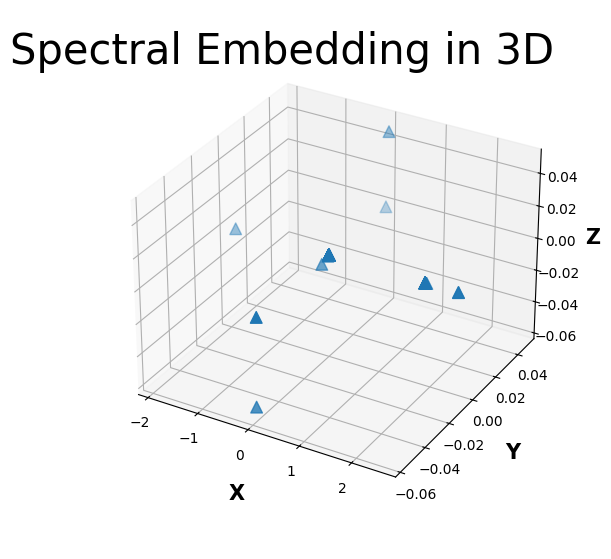

In [447]:
plot_embedding(spectral_embedding, projection='3d')

# Assign clusters to each dot  
Result heavely depends on the random initialization of KMeans, applied to spectral_embedding.  
Better to run multiple times to find the best output.

In [499]:
spectral_embedding_c = list_2d_to_lp_lp_float(list_2d=spectral_embedding, n_rows=read_rows, n_cols=k)
clustered_list = c.assign_clusters(n_rows=read_rows, n_cols=k, spectral_embedding=spectral_embedding_c, k_clusters=k)

ASSIGNED CLUSTERS LIST:
0	0.000000
1	0.000000
2	0.000000
3	0.000000
4	2.000000
5	0.000000
6	1.000000
7	2.000000
450 length list. 8 printed.



# Compare **Spectral Clustering** with other models

Dots colored black have no assigned cluster.


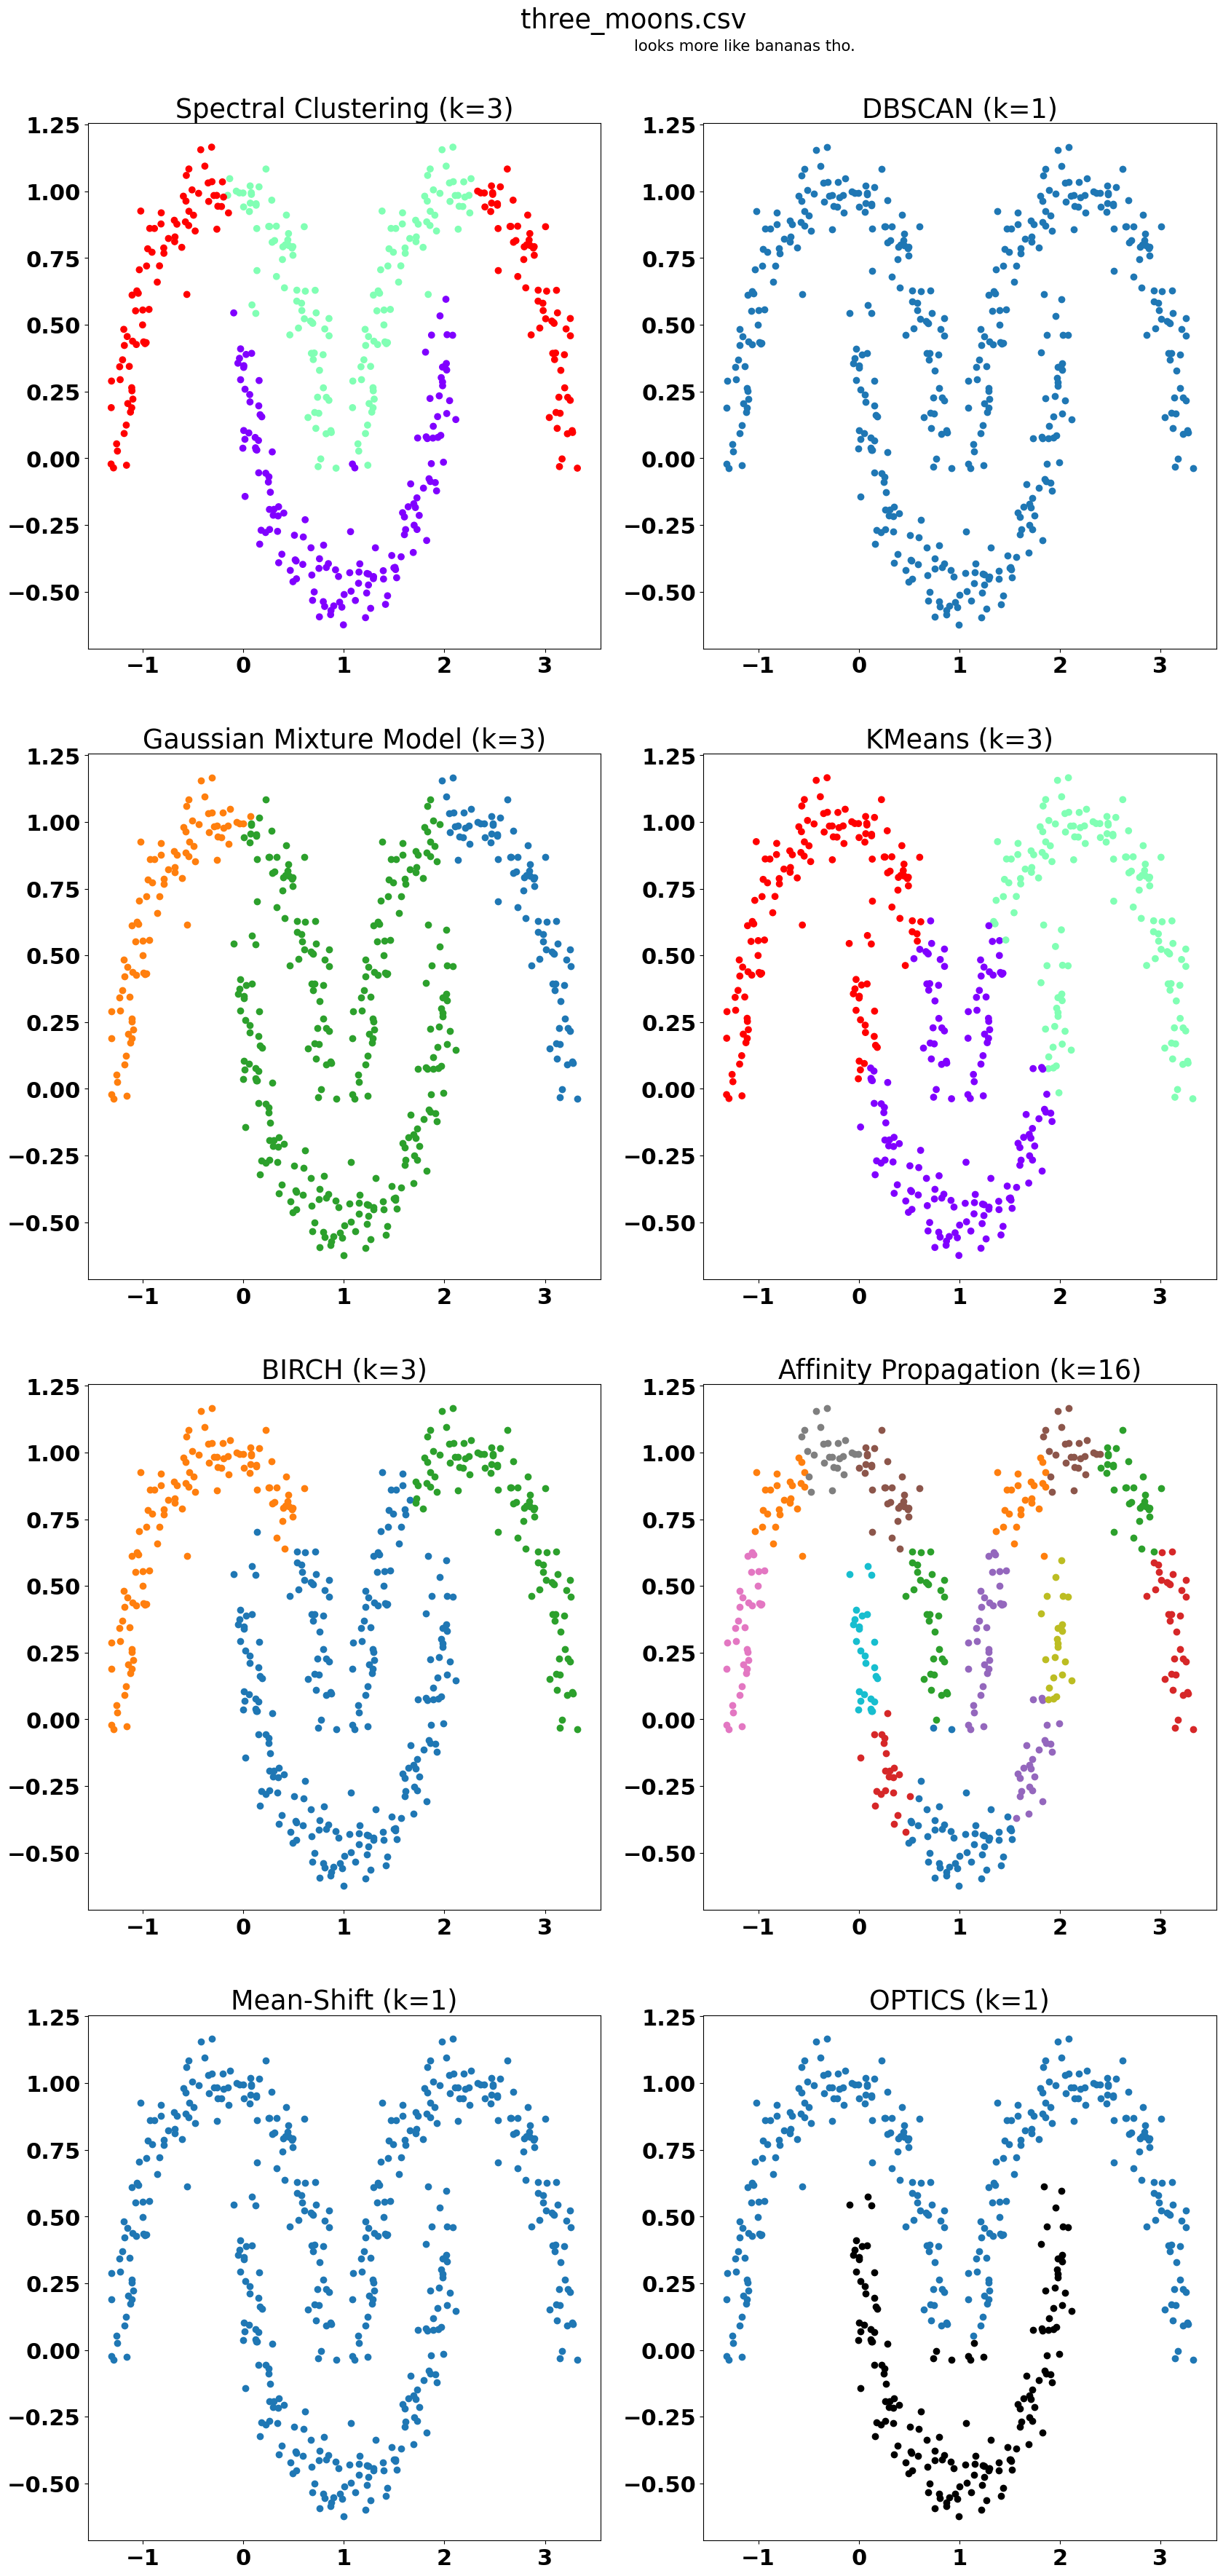

In [500]:

print("Dots colored black have no assigned cluster.")

all_dots = readCsv(FILE_PATH, read_rows)

x       = [dot[0] for dot in all_dots]
y       = [dot[1] for dot in all_dots]
cls     = [int(dot[2]) for dot in all_dots]
cls_set = set(cls)

cmap_resampled = mpl.colormaps['rainbow'].resampled(len(cls_set))
cmap = mpl.colormaps['rainbow']

fig, axis = setupMPL(FILE_NAME, COLS, ROWS, list(cls_set), cmap_resampled)

l_spectral = clustered_list
plotSPECTRAL(fig, axis, 0,0, x,y, l_spectral, cmap, f"Spectral Clustering (k={k})")

l_dbscan = dbscan(all_dots, eps=2.5, min_samples=knn) # no need for number of clusters (k)
k_dbscan = k_clusters(l_dbscan)
plotDBSCAN(fig, axis, 0,1, x,y, l_dbscan, all_dots, f"DBSCAN (k={k_dbscan})")

l_gaussian = gaussian(all_dots, k=k)
plotGaussian(fig, axis, 1,0, x,y, l_gaussian, all_dots, f"Gaussian Mixture Model (k={k})")

l_kmeans = m
plotKMEANS(fig, axis, 1,1, x,y, l_kmeans, cmap, f"KMeans (k={k})")

l_birch = birch(all_dots, threshold=0.03, n=k)
plotBIRCH(fig, axis, 2,0, x,y, l_birch, all_dots, f"BIRCH (k={k})")

l_affinity = affinity(all_dots, 0.7) # no need for number of clusters (k)
k_affinity = k_clusters(l_affinity)
plotAffinity(fig, axis, 2,1, x,y, l_affinity, all_dots, f"Affinity Propagation (k={k_affinity})")

l_mean = mean(all_dots) # no need for number of clusters (k) | bad on large scale datasets
k_mean = k_clusters(l_mean)
plotMEAN(fig, axis, 3,0, x,y, l_mean, all_dots, f"Mean-Shift (k={k_mean})")

l_optics = optics(all_dots, eps=0.5, min_samples=25) # no need for number of clusters (k)
k_optics = k_clusters(l_optics)
plotOPTICS(fig, axis, 3,1, x,y, l_optics, all_dots, f"OPTICS (k={k_optics})")
plt.show()